**MODEL BUILDING**

**Using Logistic Regression**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
# from sklearn.compose import ColumnTransformer
# from sklearn.feature_selection import SelectKBest, chi2

# for splitting training and testing data
from sklearn.model_selection import train_test_split

# for model building
from sklearn.linear_model import LogisticRegression
# from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,auc
from sklearn.tree import DecisionTreeClassifier

# for cross validation
from sklearn.model_selection import StratifiedKFold, cross_val_score

# hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.ensemble import GradientBoostingClassifier, StackingClassifier, VotingClassifier


# for Principal Component Analysis
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

import pickle


In [2]:
cleaned_df = pd.read_csv('cleaned_companies.csv')

In [3]:
cleaned_df.head()


,category_code,status,founded_at,country_code,first_investment_at,last_investment_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,isClosed,active_days
0,advertising,operating,2007,Other,2010-01-01,2012-01-01,4.373494,2021,2021,1.42538,4561781.0,2021,2021,1.356845,2.000000,30.427755,-9.598107,1,5110.0
1,Other,operating,2008,IND,2010-01-01,2012-01-01,4.373494,2021,2021,1.42538,4561781.0,2021,2021,1.356845,3.891288,22.307159,73.181219,1,4745.0
2,advertising,operating,2008,USA,2010-01-01,2012-01-01,4.373494,2021,2021,1.42538,4561781.0,2008,2008,1.000000,2.000000,35.686975,-105.937799,1,4745.0
3,web,acquired,2007,USA,2010-01-01,2012-01-01,4.373494,2008,2008,1.00000,5000000.0,2008,2012,3.000000,14.000000,37.386052,-122.083851,0,0.0
4,games_video,operating,2008,USA,2010-01-01,2012-01-01,4.373494,2021,2021,1.42538,4561781.0,2008,2008,1.000000,3.000000,33.078655,-116.601964,1,4745.0


In [4]:
for i in cleaned_df['status']:
    if (i == 'operating' or 'ipo'):
        cleaned_df['isClosed'].fillna(1, inplace=True)
    elif (i == 'acquired' or 'closed'):
        cleaned_df['isClosed'].fillna(0, inplace =True)
    

In [5]:
cleaned_df.status.value_counts()

status
operating    54539
acquired      3488
closed        1518
ipo            442
Name: count, dtype: int64

In [6]:
cleaned_df['status'] = cleaned_df['status'].replace('operating',0)
cleaned_df['status'] = cleaned_df['status'].replace('acquired',1)
cleaned_df['status'] = cleaned_df['status'].replace('closed',2)
cleaned_df['status'] = cleaned_df['status'].replace('ipo',3)

In [7]:
# Splitting data into train and test
X = cleaned_df.copy()
y = X.pop("status")
#Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

discrete_features = X.dtypes == int

# label encoding for target variables
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state=42)

In [8]:
imputer = SimpleImputer(strategy='mean')

X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [9]:
# Model Training
LR = LogisticRegression()
LR.fit(X_train,y_train)

pred_train = LR.predict(X_train)
pred_test = LR.predict(X_test)
for i in range(0,10):
    if  round(accuracy_score(y_test,pred_test)*100,2) >= 93:
        print('At Random state:',i)
        print('Training score :',round(accuracy_score(y_train,pred_train)*100,2))
        print('Testing score:',round(accuracy_score(y_test,pred_test)*100,2))

At Random state: 0
Training score : 97.56
Testing score: 97.47
At Random state: 1
Training score : 97.56
Testing score: 97.47
At Random state: 2
Training score : 97.56
Testing score: 97.47
At Random state: 3
Training score : 97.56
Testing score: 97.47
At Random state: 4
Training score : 97.56
Testing score: 97.47
At Random state: 5
Training score : 97.56
Testing score: 97.47
At Random state: 6
Training score : 97.56
Testing score: 97.47
At Random state: 7
Training score : 97.56
Testing score: 97.47
At Random state: 8
Training score : 97.56
Testing score: 97.47
At Random state: 9
Training score : 97.56
Testing score: 97.47


In [10]:
def score(clas, X_train, X_pca_test, y_train, y_test, train = True):
    if train:
        y_pred = clas.predict(X_train)
        print('\n ----- Train Result ----- \n')
        print('Accuracy Score:', accuracy_score(y_train,y_pred))
        print('\n ----- Classification Report ----- \n', classification_report(y_train,y_pred))
        print('\n ----- Confusion matrix ----- \n', confusion_matrix(y_train,y_pred))

    elif train == False:
        pred_y = clas.predict(X_test)
        print('\n ----- Test Result ----- \n')
        print('Accuracy Score:', accuracy_score(y_test,pred_y))
        print('\n ----- Classification Report ----- \n', classification_report(y_test,pred_y))
        print('\n ----- Confusion matrix ----- \n', confusion_matrix(y_test,pred_y))

In [11]:
LR.fit(X_train,y_train)
score(LR, X_train, X_test, y_train, y_test, train = True)
score(LR, X_train, X_test, y_train, y_test, train = False)


 ----- Train Result ----- 

Accuracy Score: 0.9756194127820959

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     43655
           1       0.82      0.90      0.86      2767
           2       0.70      0.55      0.62      1209
           3       0.62      0.09      0.16       358

    accuracy                           0.98     47989
   macro avg       0.78      0.64      0.66     47989
weighted avg       0.97      0.98      0.97     47989


 ----- Confusion matrix ----- 
 [[43634     0     0    21]
 [    0  2482   285     0]
 [    0   540   669     0]
 [  324     0     0    34]]

 ----- Test Result ----- 

Accuracy Score: 0.9747457909651609

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     10884
           1       0.81      0.91      0.86       721
           2       0.70      0.50      0.59       309
   

[[10877     0     0     7]
 [    0   653    68     0]
 [    0   153   156     0]
 [   75     0     0     9]]


<Axes: >

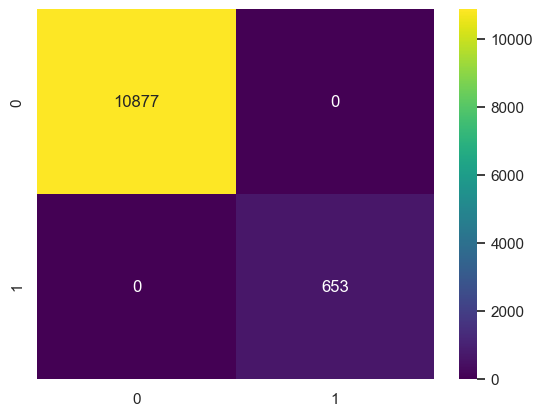

In [12]:
c_matrix = confusion_matrix(y_test, pred_test)
print(c_matrix)
c_mat= c_matrix[0:2,0:2]
#visualizing the confusion matrix
sns.heatmap(c_mat,annot=True, fmt='d', cmap='viridis')

[[43634     0     0    21]
 [    0  2482   285     0]
 [    0   540   669     0]
 [  324     0     0    34]]


<Axes: >

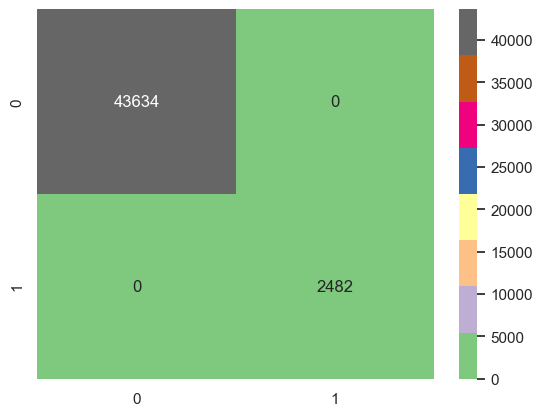

In [13]:
con_matrix = confusion_matrix(y_train, pred_train)
print(con_matrix)
con_mat= con_matrix[0:2,0:2]
#visualizing the confusion matrix
sns.heatmap(con_mat,annot=True, fmt='d', cmap='Accent')

**CROSSFOLD VALIDATION USING STRATIFIEDKFOLD**

In [14]:
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [15]:
scores = cross_val_score(LR, X_train, y_train, cv=stratified_kfold , scoring='accuracy')
print("Cross-Validation Scores: ", scores)

# Calculate and display the mean and standard deviation of the scores
print("Mean Accuracy: ", scores.mean())
print("Standard Deviation of Accuracy: ", scores.std())

Cross-Validation Scores:  [0.97791207 0.97499479 0.97832882 0.97166076 0.97624505 0.9758283
 0.97228589 0.9766618  0.97270265 0.97665694]
Mean Accuracy:  0.9753277069585412
Standard Deviation of Accuracy:  0.0022366326411610528


**HYPERPARAMETER TUNING**

**1. GRID SEARCHCV**

**2. RANDOMIZED SEARCHCV**

In [16]:
param_grid = {
    'penalty' :['l1','l2'],
    'C': np.logspace(-4, 4, 20),
    'solver':['newton-cg']
}

In [17]:
grid_search = GridSearchCV(LR, param_grid = param_grid, cv=3,n_jobs=-1,verbose=True)

In [18]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2'], 'solver': ['newton-cg']},
             verbose=True)

In [19]:
print("Grid Search - Best Hyperparameters:", grid_search.best_params_)
print("Grid Search - Best Accuracy:", grid_search.best_score_)

Grid Search - Best Hyperparameters: {'C': 1438.44988828766, 'penalty': 'l2', 'solver': 'newton-cg'}
Grid Search - Best Accuracy: 0.9756402604224643


In [20]:
# Randomized SearchCV
param_random = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

In [21]:
random_search = RandomizedSearchCV(estimator=LR, param_distributions=param_random, cv=stratified_kfold, scoring='accuracy', n_iter=10, random_state=42)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
                   estimator=LogisticRegression(),
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear']},
                   random_state=42, scoring='accuracy')

In [22]:
print("RandomizedSearch - Best Hyperparameters:", random_search .best_params_)
print("RandomizedSearch- Best Accuracy:", random_search .best_score_)

RandomizedSearch - Best Hyperparameters: {'solver': 'liblinear', 'penalty': 'l1', 'C': 10}
RandomizedSearch- Best Accuracy: 0.9757235923733937


**MODEL BUILDING USING GRADIENT BOOSTING**

In [23]:
gradient_booster = GradientBoostingClassifier()
gradient_booster.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [24]:
gradient_booster.fit(X_train,y_train)
print(classification_report(y_test,gradient_booster.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     10884
           1       0.83      0.93      0.88       721
           2       0.78      0.56      0.65       309
           3       0.49      0.23      0.31        84

    accuracy                           0.98     11998
   macro avg       0.77      0.68      0.71     11998
weighted avg       0.98      0.98      0.98     11998



**Hyperparameter Tuning using GridSearchCV**

In [25]:
grid = {'learning_rate':[0.05,0.1,0.25,1,10],'n_estimators':np.arange(40,70,10)}


gb = GradientBoostingClassifier()

gb_cv = GridSearchCV(gb, grid, cv = 4)

gb_cv.fit(X_train,y_train)

print("Best Parameters:",gb_cv.best_params_)

print("Train Score:",gb_cv.best_score_)

print("Test Score:",gb_cv.score(X_test,y_test))

Best Parameters: {'learning_rate': 0.1, 'n_estimators': 50}
Train Score: 0.9769113841776552
Test Score: 0.9774129021503584


In [26]:
def display(results):
  print(f'Best parameters are: {results.best_params_}')
  print("\n")
  mean_score = results.cv_results_['mean_test_score']
  std_score = results.cv_results_['std_test_score']
  params = results.cv_results_['params']
  for mean,std,params in zip(mean_score,std_score,params):
    print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

In [27]:
#tune model tree specific parameters
grid = {'max_depth':[2,3,4,5,6,7] }

gb = GradientBoostingClassifier(learning_rate=0.1,n_estimators=60)

gb_cv = GridSearchCV(gb, grid, cv = 4)

gb_cv.fit(X_train,y_train)

print("Best Parameters:",gb_cv.best_params_)

print("Train Score:",gb_cv.best_score_)

print("Test Score:",gb_cv.score(X_test,y_test))

Best Parameters: {'max_depth': 4}
Train Score: 0.9768488807065911
Test Score: 0.9776629438239707


In [28]:
#save tuned model

gbm_tuned = GradientBoostingClassifier(learning_rate=0.1,n_estimators=60,max_depth=3)

gbm_tuned.fit(X_train,y_train)

print(classification_report(y_test,gbm_tuned.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     10884
           1       0.83      0.93      0.88       721
           2       0.78      0.55      0.65       309
           3       0.49      0.23      0.31        84

    accuracy                           0.98     11998
   macro avg       0.77      0.68      0.71     11998
weighted avg       0.98      0.98      0.98     11998



**BUILDING A PIPELINE**

In [29]:
X = cleaned_df.copy()
y = cleaned_df[['isClosed','status']]
yClosed = X.pop('isClosed')
ystatus = X.pop('status')
X.columns

Index(['category_code', 'founded_at', 'country_code', 'first_investment_at',
       'last_investment_at', 'investment_rounds', 'first_funding_at',
       'last_funding_at', 'funding_rounds', 'funding_total_usd',
       'first_milestone_at', 'last_milestone_at', 'milestones',
       'relationships', 'lat', 'lng', 'active_days'],
      dtype='object')

In [30]:
X=X[[
    'founded_at', 'first_funding_at', 'last_funding_at', 'funding_rounds', 'funding_total_usd', 'first_milestone_at', 'last_milestone_at', 'milestones', 'relationships'
]]

In [31]:
closed = yClosed.value_counts(); print(closed)
status = ystatus.value_counts(); print(status)

isClosed
1    54981
0     5006
Name: count, dtype: int64
status
0    54539
1     3488
2     1518
3      442
Name: count, dtype: int64


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

ystatus_train = y_train.iloc[:,1]
yClosed_train = y_train.iloc[:,0]

ystatus_test = y_test.iloc[:,1]
yClosed_test = y_test.iloc[:,0]

In [33]:
pca = PCA(n_components = 9)
over = RandomOverSampler(random_state=0)
smote = SMOTE()

stdscaler = StandardScaler()
scaler = MinMaxScaler()

In [34]:
Log_regression = LogisticRegression()
decision_tree = DecisionTreeClassifier()
from sklearn.ensemble import RandomForestClassifier
Ran_forest = RandomForestClassifier()


In [35]:
x_over, y_over = over.fit_resample(X_train, yClosed_train)

In [36]:
pipeline_randomforest =  Pipeline([('scaler1', StandardScaler()),
                                   ('pca',pca),
                               ('rf_classifier',RandomForestClassifier(n_estimators = 100, min_samples_split = 10, min_samples_leaf = 2, max_features= 'sqrt',max_depth = 18))])
pipeline_randomforest.fit(x_over,y_over)

Pipeline(steps=[('scaler1', StandardScaler()), ('pca', PCA(n_components=9)),
                ('rf_classifier',
                 RandomForestClassifier(max_depth=18, min_samples_leaf=2,
                                        min_samples_split=10))])

In [37]:
pickle.dump(pipeline_randomforest, open('models/random.pkl', 'wb'))

In [38]:
rf_model = pickle.load(open('models/random.pkl', 'rb'))

In [39]:
test_input2 = np.array([2006,2008,2008,1.00000,4561781.0,2021,2021,1.356845,5.000000]).reshape(1,9)

In [40]:
rf_model.predict(test_input2)

array([0], dtype=int64)

In [41]:
# create pipeline with Logistic Regression
pipe = Pipeline([
    ('scaler', stdscaler),
    ('pca', pca),
    ('classifier', LogisticRegression(C= 1.623776739188721, penalty= 'l2', solver= 'newton-cg'))
])

In [42]:
#display pipeline
from sklearn import set_config
set_config(display='diagram')

In [43]:
pipe.fit(x_over, y_over)


Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=9)),
                ('classifier',
                 LogisticRegression(C=1.623776739188721, solver='newton-cg'))])

In [44]:
pred = pipe.predict(X_test)
print('test accuracy = ', round(accuracy_score(yClosed_test, pred)*100, 2), '%')

test accuracy =  72.4 %


In [45]:
# Create pipeline with Gradient Boosting
Grad_boosting = GradientBoostingClassifier()

In [46]:
X_train_smote, ystatus_train_Smote = smote.fit_resample(X_train, ystatus_train)

In [47]:
pipeline_grad_boosting = Pipeline([
    ('scaler', stdscaler),
    ('pca', pca),
    ('classifier', GradientBoostingClassifier(learning_rate=0.1,n_estimators=60,max_depth=3))
])

In [48]:
pipeline_grad_boosting.fit(X_train_smote, ystatus_train_Smote)


Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=9)),
                ('classifier', GradientBoostingClassifier(n_estimators=60))])

In [49]:
pred1 = pipeline_grad_boosting.predict(X_test)
print('test accuracy = ', round(accuracy_score(ystatus_test, pred1)*100, 2), '%')

test accuracy =  66.24 %


**Ensemble Learning**

In [63]:
model_ensemble = Pipeline([
    ('stdscaler', stdscaler),
    ('pca',pca),
    
    ('classifier', VotingClassifier([('Logistic Regression',Log_regression), ('Gradient Boosting', Grad_boosting)]))
])

In [64]:
model_ensemble.fit(X_train_smote, ystatus_train_Smote)

Pipeline(steps=[('stdscaler', StandardScaler()), ('pca', PCA(n_components=9)),
                ('classifier',
                 VotingClassifier(estimators=[('Logistic Regression',
                                               LogisticRegression()),
                                              ('Gradient Boosting',
                                               GradientBoostingClassifier())]))])

In [65]:
pred2 = model_ensemble.predict(X_test)
print('test accuracy = ', round(accuracy_score(ystatus_test, pred2)*100, 2), '%')

test accuracy =  73.94 %


In [66]:
#save the model
import pickle
pickle.dump(pipe, open('models/binaryclassifier.pkl', 'wb'))
pickle.dump(pipeline_grad_boosting, open('models/multiclass.pkl', 'wb'))
pickle.dump(model_ensemble, open('models/ensemble.pkl', 'wb'))

In [54]:
binary_pipeline = pickle.load(open('models/binaryclassifier.pkl','rb'))

In [55]:
#assume user data  operating 2007,2021,2021,1.42538,4561781.0,2021,2021,1.356845,2.000000
# acquired 2007,2008,2008,1.00000,5000000.0,2008,2012,3.000000,14.000000
# ipo 2008,2021,2021,1.42538,4561781.0,2010,2013,4.000000,100.000000
test_input = np.array([2008,2021,2021,1.42538,4561781.0,2010,2013,4.000000,100.000000]).reshape(1,9)

In [56]:
binary_pipeline.predict(test_input)

array([0], dtype=int64)

In [57]:
models = pickle.load(open('models/multiclass.pkl','rb'))

In [58]:
#assume user data 2006,2008,2008,1.00000,4561781.0,2021,2021,1.356845,5.000000
test_input1 = np.array([2007,2021,2021,1.42538,4561781.0,2021,2021,1.356845,2.000000]).reshape(1,9)

In [59]:
models.predict(test_input1)

array([0], dtype=int64)

In [60]:
ensemble_m = pickle.load(open('models/ensemble.pkl','rb'))

In [71]:
test_input4 = np.array([2008,2021,2021,1.42538,4561781.0,2010,2013,4.000000,100.000000]).reshape(1,9)

In [72]:
ensemble_m.predict(test_input4)

array([3], dtype=int64)